# Multipoles

**Scott Prahl**

**Feb 2025**

This notebook shows how individual multipoles can be extracted using `miepython`

Mie theory determines the scattering amplitudes $S_1$ and $S_2$. 

$$
S_1(\cos\theta) = \sum_{n=1}^\infty \frac{2n+1}{n(n+1)} \left[ a_n \pi_n(\cos\theta)+b_n\tau_n(\cos\theta)\right]
$$

and

$$
S_2(\cos\theta) = \sum_{n=1}^\infty  \frac{2n+1}{n(n+1)} \left[a_n \tau_n(\cos\theta)+b_n\pi_n(\cos\theta) \right]
$$

These solutions can be understood as a multipole expansion of the scattered radiation. For instance, $a_1$, $a_2$, and $a_3$ represent the magnitudes of electric dipole, quadrupole, and octupole radiation, respectively. Similarly, the parameters $b_n$ correspond to coefficients for the magnetic multipole radiation. Both $a_n$ and $b_n$ are generally complex values.

Notice that all the angular information is in functions $\tau_n$ and $\pi_n$
$$
\pi_n(\cos\theta) = \frac{P^1_n(\cos\theta)}{\sin\theta}
$$
and
$$
\tau_n(\cos\theta)=\frac{d P^1_n(\cos\theta)}{d\theta}
$$

The first few $pi_n$ are

$$
\pi_1(\cos\theta) = 1
$$
$$
\pi_2(\cos\theta) = 3\cos\theta
$$
$$
\pi_3(\cos\theta) = \frac{15}{2} \cos^2\theta - \frac{3}{2}
$$
$$
\pi_4(\cos\theta) = \frac{35}{2} \cos^3\theta - \frac{15}{2} \cos\theta
$$

The first few $\tau_n$ are

$$
\tau_1(\cos\theta) = \cos\theta
$$
$$
\tau_2(\cos\theta) = 6\cos^2\theta-3
$$
$$
\tau_3(\cos\theta) = \frac{45}{2} \cos^3\theta - \frac{33}{2}\cos\theta
$$
$$
\tau_4(\cos\theta) =  70\cos^4\theta - \frac{135}{2} \cos^2\theta + \frac{15}{2}
$$

The above equations were used to verify the implementation of the general `mie_pi()` and `mie_tau()` functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lpmv
import miepython as mie
from miepython.vsh import mie_pi, mie_tau
from miepython.util import cs as comp_str

%config InlineBackend.figure_format = 'retina'

### Plotting $\pi_n(\cos\theta)$ and $\tau_n(\cos\theta)$ 

In [2]:
def mie_pi_dipole(theta):
    """
    Computes the angular variation of the electric field due to the electric dipole 𝜋₁(𝜃).

    Args:
        theta (float or numpy.ndarray): Angle in radians.

    Returns:
        float or numpy.ndarray: Amplitude of 𝜋₁(𝜃).
    """
    x = 1 + 0 * theta
    return x


def mie_tau_dipole(theta):
    """
    Computes the angular variation of the electric field due to the magnetic dipole 𝜏₁(𝜃).

    Args:
        theta (float or numpy.ndarray): Angle in radians.

    Returns:
        float or numpy.ndarray: Amplitude of 𝜏₁(𝜃).
    """
    x = np.cos(theta)
    return x


def mie_pi_quadrupole(theta):
    """
    Computes the angular variation of the electric field due to the electric quadrupole 𝜋₂(𝜃).

    Args:
        theta (float or numpy.ndarray): Angle in radians.

    Returns:
        float or numpy.ndarray: Amplitude of 𝜋₂(𝜃).
    """
    x = np.cos(theta)
    return 3 * x


def mie_tau_quadrupole(theta):
    """
    Computes the angular variation of the electric field due to the magnetic quadrupole 𝜏₂(𝜃).

    Args:
        theta (float or numpy.ndarray): Angle in radians.

    Returns:
        float or numpy.ndarray: Amplitude of 𝜏₂(𝜃).
    """
    x = np.cos(theta)
    return 6 * x**2 - 3


def mie_pi_octopole(theta):
    """
    Computes the angular variation of the electric field due to the electric octopole 𝜋₃(𝜃).

    Args:
        theta (float or numpy.ndarray): Angle in radians.

    Returns:
        float or numpy.ndarray: Amplitude of 𝜋₃(𝜃).
    """
    x = np.cos(theta)
    return 3 / 2 * (5 * x**2 - 1)


def mie_tau_octopole(theta):
    """
    Computes the angular variation of the electric field due to the magnetic octopole 𝜏₃(𝜃).

    Args:
        theta (float or numpy.ndarray): Angle in radians.

    Returns:
        float or numpy.ndarray: Amplitude of 𝜏₃(𝜃).
    """
    x = np.cos(theta)
    return 45 / 2 * x**3 - 33 / 2 * x


def mie_pi_hexadecapole(theta):
    """
    Computes the angular variation of the electric field due to the electric hexadecapole 𝜋₄(𝜃).

    Args:
        theta (float or numpy.ndarray): Angle in radians.

    Returns:
        float or numpy.ndarray: Amplitude of 𝜋₄(𝜃).
    """
    x = np.cos(theta)
    return 35 / 2 * x**3 - 15 / 2 * x


def mie_tau_hexadecapole(theta):
    """
    Computes the angular variation of the electric field due to the magnetic hexadecapole 𝜏₄(𝜃).

    Args:
        theta (float or numpy.ndarray): Angle in radians.

    Returns:
        float or numpy.ndarray: Amplitude of 𝜏₄(𝜃).
    """
    x = np.cos(theta)
    return 70 * x**4 - 135 / 2 * x**2 + 15 / 2

It is a bit tricky to plot these using polar plots because matplotlib automatically throws out negative radii.  Since these should be plotted with an angle increased by 180°, we have to do be a bit careful.  If we are then we can replicated figure 4.3 in Bohren and Huffman.  Note that all plots are on the same scale.

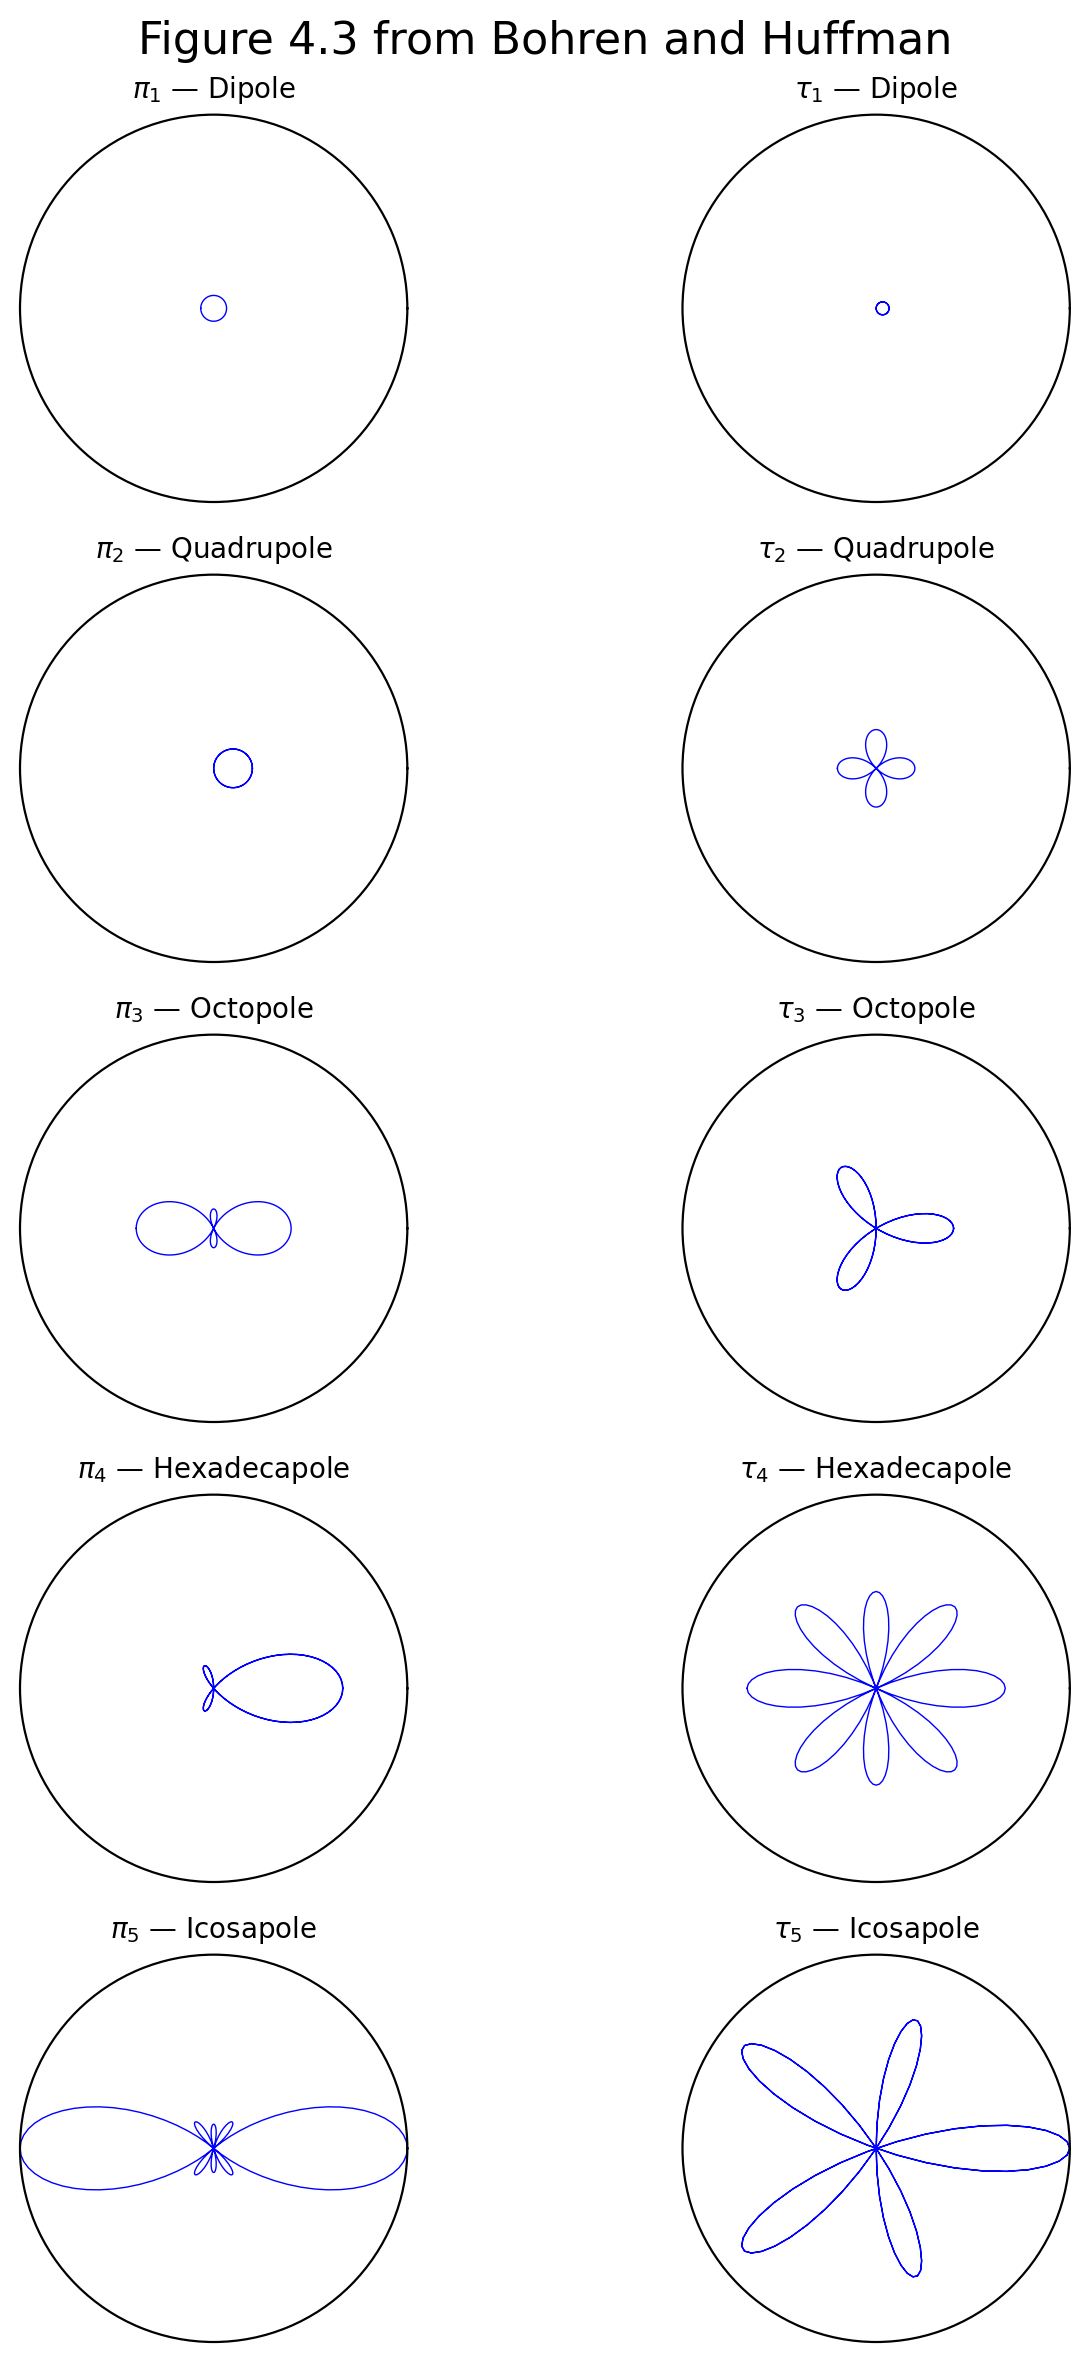

In [3]:
thetad = np.linspace(-180, 180, 181)
theta = np.radians(thetad)

# Set up the plot
fig, axes = plt.subplots(5, 2, figsize=(8, 12), subplot_kw={"polar": True})
fig.suptitle("Figure 4.3 from Bohren and Huffman", fontsize=16)

titles = [
    (r"$\pi_1$ — Dipole", r"$\tau_1$ — Dipole"),
    (r"$\pi_2$ — Quadrupole", r"$\tau_2$ — Quadrupole"),
    (r"$\pi_3$ — Octopole", r"$\tau_3$ — Octopole"),
    (r"$\pi_4$ — Hexadecapole", r"$\tau_4$ — Hexadecapole"),
    (r"$\pi_5$ — Icosapole", r"$\tau_5$ — Icosapole"),
]

for i, (title1, title2) in enumerate(titles):
    row = i
    r = mie_pi(row + 1, theta)
    axes[row, 0].plot(theta + (r < 0) * np.pi, abs(r), color="blue", lw=0.5)
    axes[row, 0].set_title(title1, fontsize=10)
    axes[row, 0].set_xticks([])
    axes[row, 0].grid(True)
    axes[row, 0].set_ylim(0, 15)
    axes[row, 0].set_yticks([])

    # Right column (parallel)
    r = mie_tau(row + 1, theta)
    axes[row, 1].plot(theta + (r < 0) * np.pi, abs(r), color="blue", lw=0.5)
    axes[row, 1].set_title(title2, fontsize=10)
    axes[row, 1].set_xticks([])
    axes[row, 1].grid(True)
    axes[row, 1].set_ylim(0, 15)
    axes[row, 1].set_yticks([])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

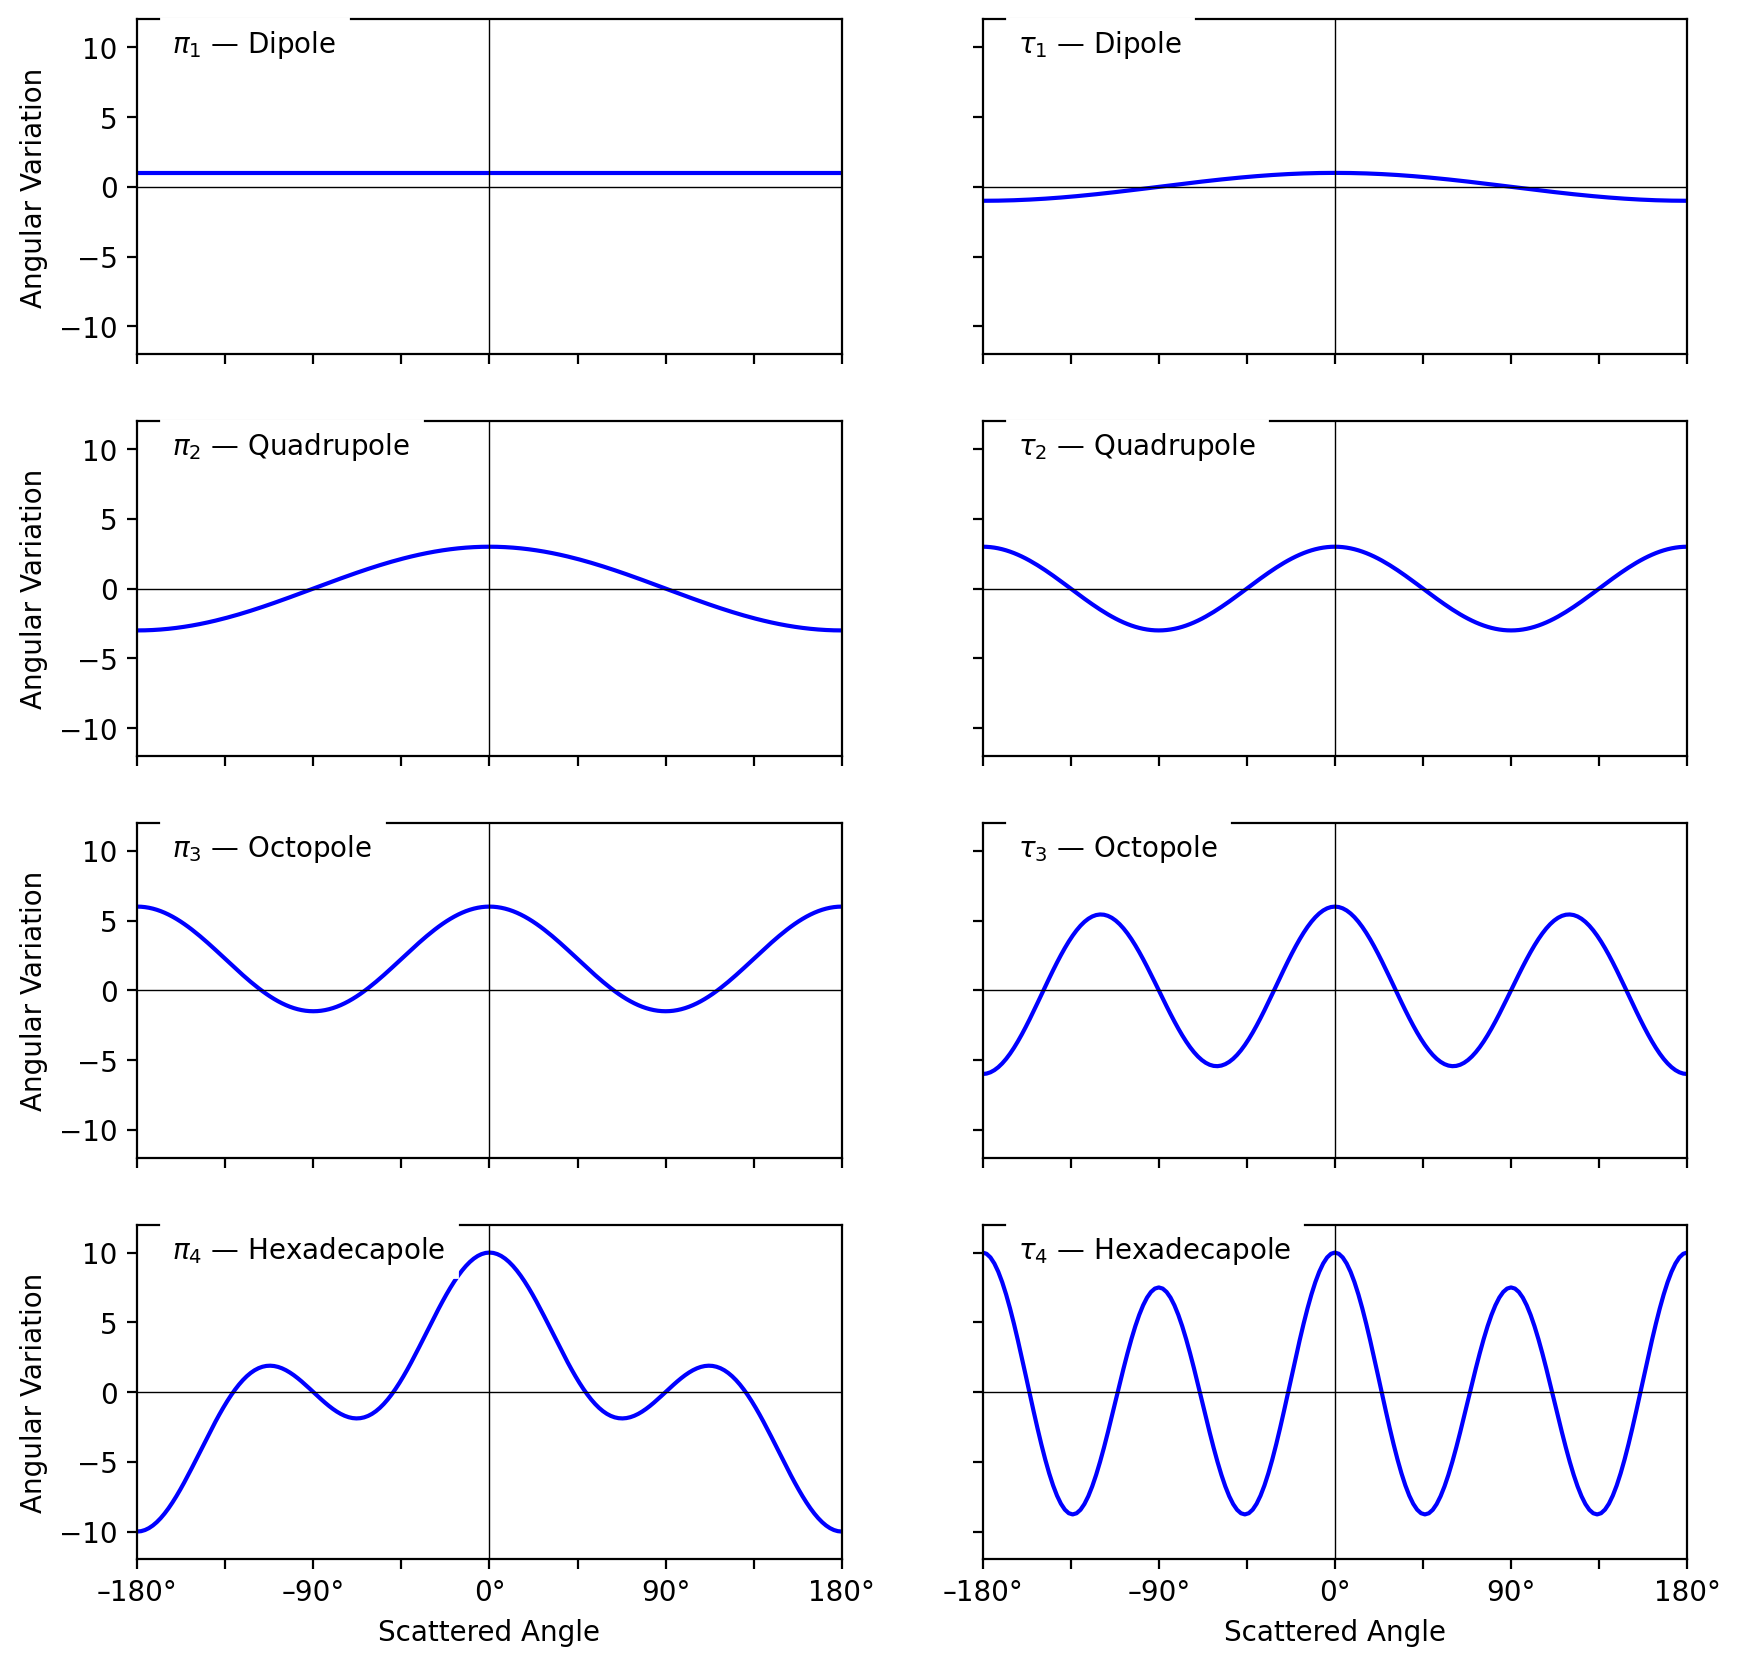

In [4]:
n_sph = 1.5
n_env = 1.333
d = 1
lambda0 = 0.805
thetad = np.linspace(-180, 180, 181)
theta = np.radians(thetad)
mu = np.cos(theta)


def set_labels(s, n):
    plt.text(
        0.05,
        0.90,
        s,
        transform=plt.gca().transAxes,
        fontsize=10,
        bbox=dict(facecolor="white", edgecolor="white"),
    )
    plt.xlabel("")
    plt.xticks([-180, -135, -90, -45, 0, 45, 90, 135, 180])
    plt.xlim(-180, 180)
    plt.gca().set_xticklabels([])
    plt.grid(False)
    plt.axhline(0, color="black", lw=0.5)
    plt.axvline(0, color="black", lw=0.5)
    if n % 2 == 1:
        plt.ylabel(r"Angular Variation")


plt.subplots(4, 2, figsize=(10, 10), sharey=True)

plt.subplot(4, 2, 1)
plt.ylim(-12, 12)
# plt.plot(thetad, mie_pi_dipole(theta), color='blue')
plt.plot(thetad, mie_pi(1, theta), color="blue")
plt.ylabel(r"Scattered Amplitude")
set_labels(r"$\pi_1$ — Dipole", 1)

plt.subplot(4, 2, 2)
# plt.plot(thetad, mie_tau_dipole(theta), color='blue')
plt.plot(thetad, mie_tau(1, theta), color="blue")
set_labels(r"$\tau_1$ — Dipole", 2)

plt.subplot(4, 2, 3)
# plt.plot(thetad, mie_pi_quadrupole(theta), color='blue')
plt.plot(thetad, mie_pi(2, theta), color="blue")
set_labels(r"$\pi_2$ — Quadrupole", 3)

plt.subplot(4, 2, 4)
# plt.plot(thetad, mie_tau_quadrupole(theta), color='blue')
plt.plot(thetad, mie_tau(2, theta), color="blue")
set_labels(r"$\tau_2$ — Quadrupole", 4)

plt.subplot(4, 2, 5)
# plt.plot(thetad, mie_pi_octopole(theta), color='blue')
plt.plot(thetad, mie_pi(3, theta), color="blue")
set_labels(r"$\pi_3$ — Octopole", 5)

plt.subplot(4, 2, 6)
# plt.plot(thetad, mie_tau_octopole(theta), color='blue')
plt.plot(thetad, mie_tau(3, theta), color="blue")
set_labels(r"$\tau_3$ — Octopole", 6)

plt.subplot(4, 2, 7)
# plt.plot(thetad, mie_pi_hexadecapole(theta), color='blue')
plt.plot(thetad, mie_pi(4, theta), color="blue")
set_labels(r"$\pi_4$ — Hexadecapole", 7)
plt.gca().set_xticklabels(["–180°", "", "–90°", "", "0°", "", "90°", "", "180°"])
plt.xlabel("Scattered Angle")

plt.subplot(4, 2, 8)
# plt.plot(thetad, mie_tau_hexadecapole(theta), color='blue')
plt.plot(thetad, mie_tau(4, theta), color="blue")
set_labels(r"$\tau_4$ — Hexadecapole", 8)
plt.gca().set_xticklabels(["–180°", "", "–90°", "", "0°", "", "90°", "", "180°"])
plt.xlabel("Scattered Angle")

plt.show()

### Plotting multipole intensities 

The contribution from $\pi_n$ and $\tau_n$ to the electric field on the electric field nth multipole coefficient $a_n$ and the nth magnetic field coefficient $b_n$.

Since $a_n$ and $b_n$ are complex, the electric field amplitudes are complex as well.  The natural thing to do is to plot intensities for each multipole.  However, it must be understood that the actual intensity field is **not** the sum of the intensity of each multipole, but rather the sum of the electric field amplitudes for each multiple --- which is then converted to an intensity.  This is merely stating that the sum of the squares is not equal to the square of the sum.

So with that understanding, we can visualize the rough contribution from each multipole.  We will start with spheres in water that have a diameter of one micron.

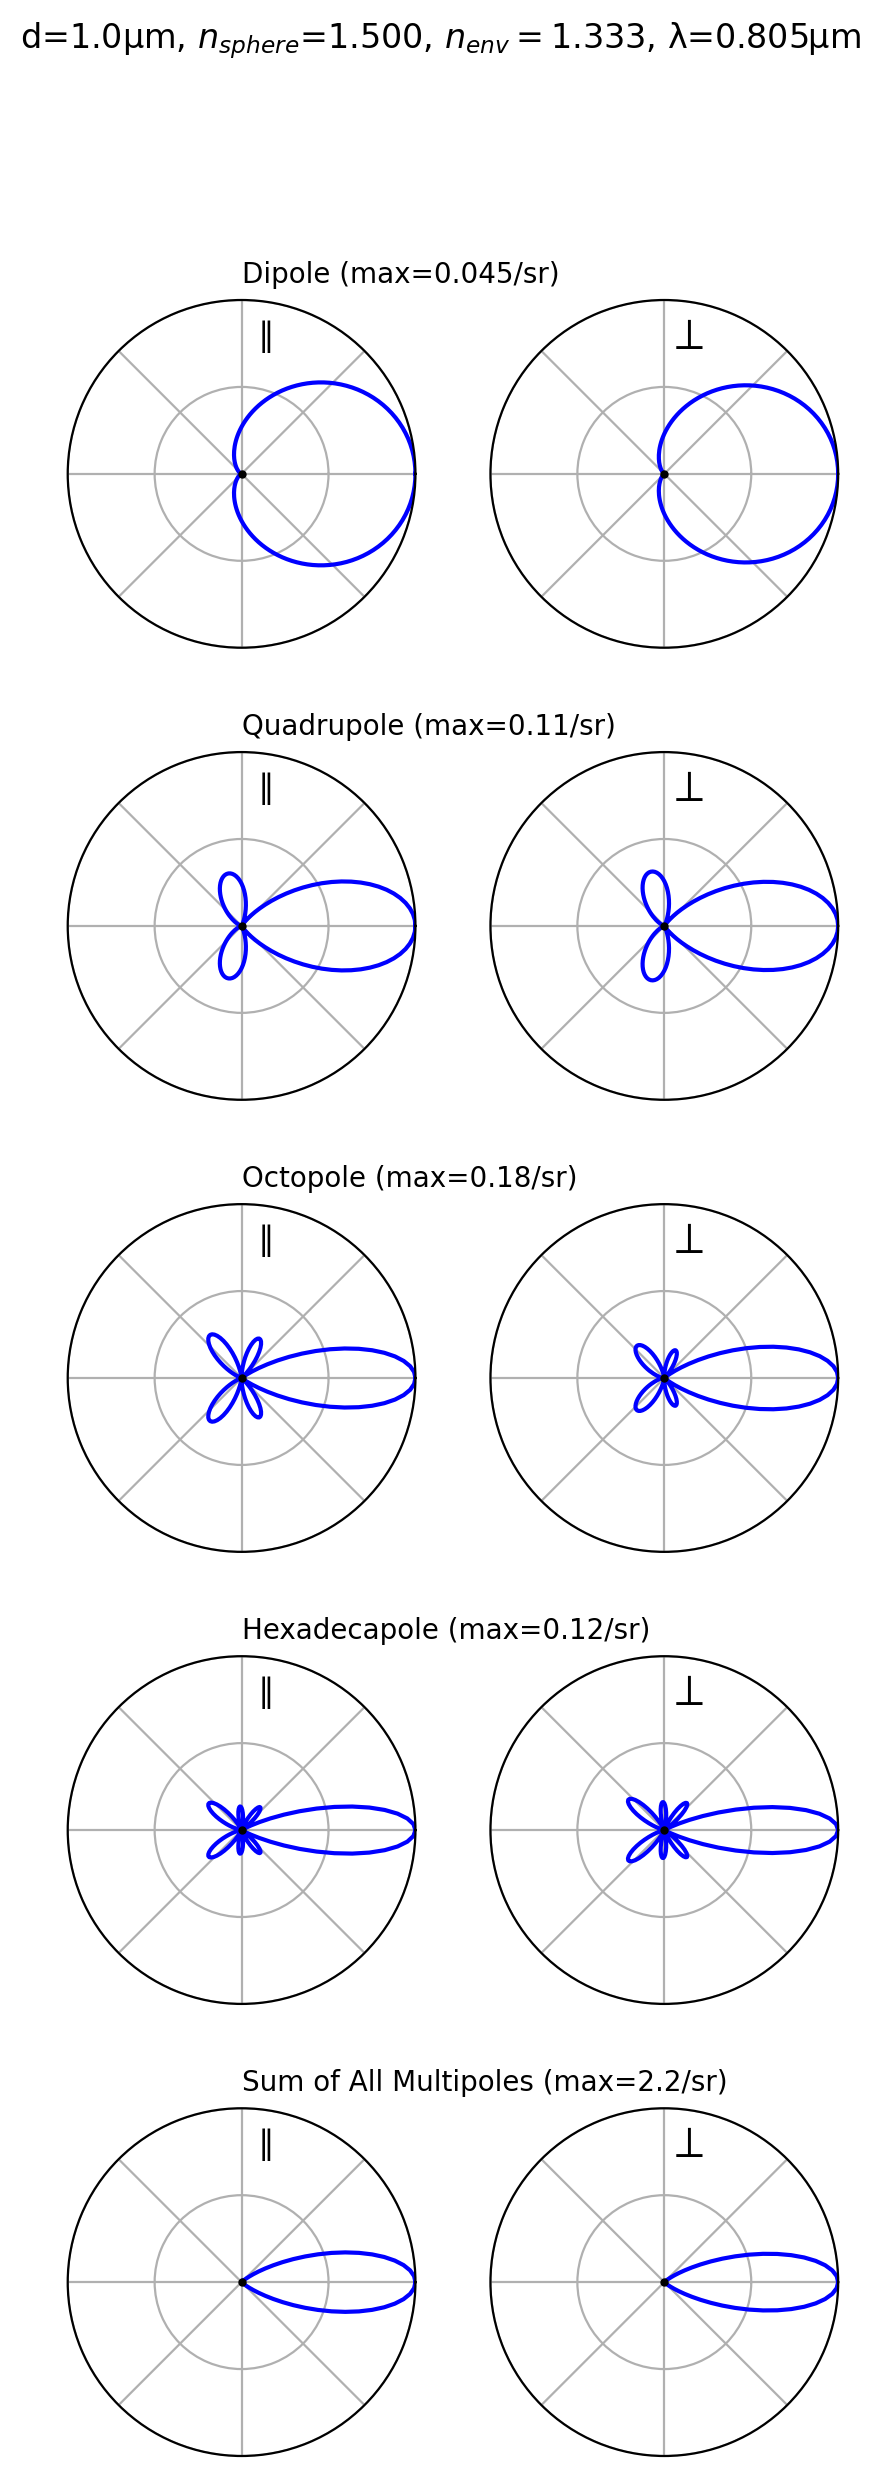

In [5]:
n_sph = 1.5
n_env = 1.333
d = 1
lambda0 = 0.805
thetad = np.linspace(0, 360, 181)
theta = np.radians(thetad)
mu = np.cos(theta)

# Set up the plot
fig, axes = plt.subplots(
    5, 2, figsize=(5, 14), subplot_kw={"polar": True}, gridspec_kw={"hspace": 0.3}
)
fig.suptitle(
    "d=%.1fµm, $n_{sphere}$=%.3f, $n_{env}=$%.3f, λ=%.3fµm" % (d, n_sph, n_env, lambda0),
    fontsize=12,
)

titles = [
    (r"$\perp$ — Dipole", r"$\parallel$ — Dipole"),
    (r"$\perp$ — Quadrupole", r"$\parallel$ — Quadrupole"),
    (r"$\perp$ — Octopole", r"$\parallel$ — Octopole"),
    (r"$\perp$ — Hexadecapole", r"$\parallel$ — Hexadecapole"),
    (r"$\perp$ — All terms", r"$\parallel$ — All terms"),
]

title = [
    "Dipole",
    "Quadrupole",
    "Octopole",
    "Hexadecapole",
    "Sum of All Multipoles",
]

term = np.array([1, 2, 3, 4, 0])

for i, (title1, title2) in enumerate(titles):
    row = i
    par, per = mie.intensities(n_sph, d, lambda0, mu, n_env=n_env, n_pole=term[row])

    maxx = np.max(par)
    # Left column (perpendicular)
    axes[row, 0].set_rlabel_position(135)  # This will position the labels at 45 degrees
    axes[row, 0].plot(theta, per / maxx, color="blue")
    axes[row, 0].plot([0], [0], "ok", markersize=2)

    axes[row, 0].set_ylabel("")
    axes[row, 0].set_xticklabels([])
    axes[row, 0].set_rmax(1)
    axes[row, 0].set_yticks([0.5, 1.0])
    axes[row, 0].set_yticklabels(["", ""])
    axes[row, 0].text(np.pi / 2, 1.1, "%s (max=%.2g/sr)" % (title[row], maxx))
    axes[row, 0].text(np.pi / 2.2, 0.8, r"$\parallel$", fontsize=12, ha="center", va="center")

    # Right column (parallel)
    maxx = np.max(per)
    axes[row, 1].set_rlabel_position(135)  # This will position the labels at 45 degrees
    axes[row, 1].plot(theta, par / maxx, color="blue")
    axes[row, 1].plot([0], [0], "ok", markersize=2)
    axes[row, 1].set_ylabel("")
    axes[row, 1].set_xticklabels([])
    axes[row, 1].set_rmax(1)
    axes[row, 1].set_yticks([0.5, 1.0])
    axes[row, 1].set_yticklabels(["", ""])
    axes[row, 1].text(np.pi / 2.2, 0.8, r"$\perp$", fontsize=16, ha="center", va="center")

plt.show()

It the sphere diameter is reduced to 0.2 microns then it is clear that parallel and perpendicular scattered intensities are very different

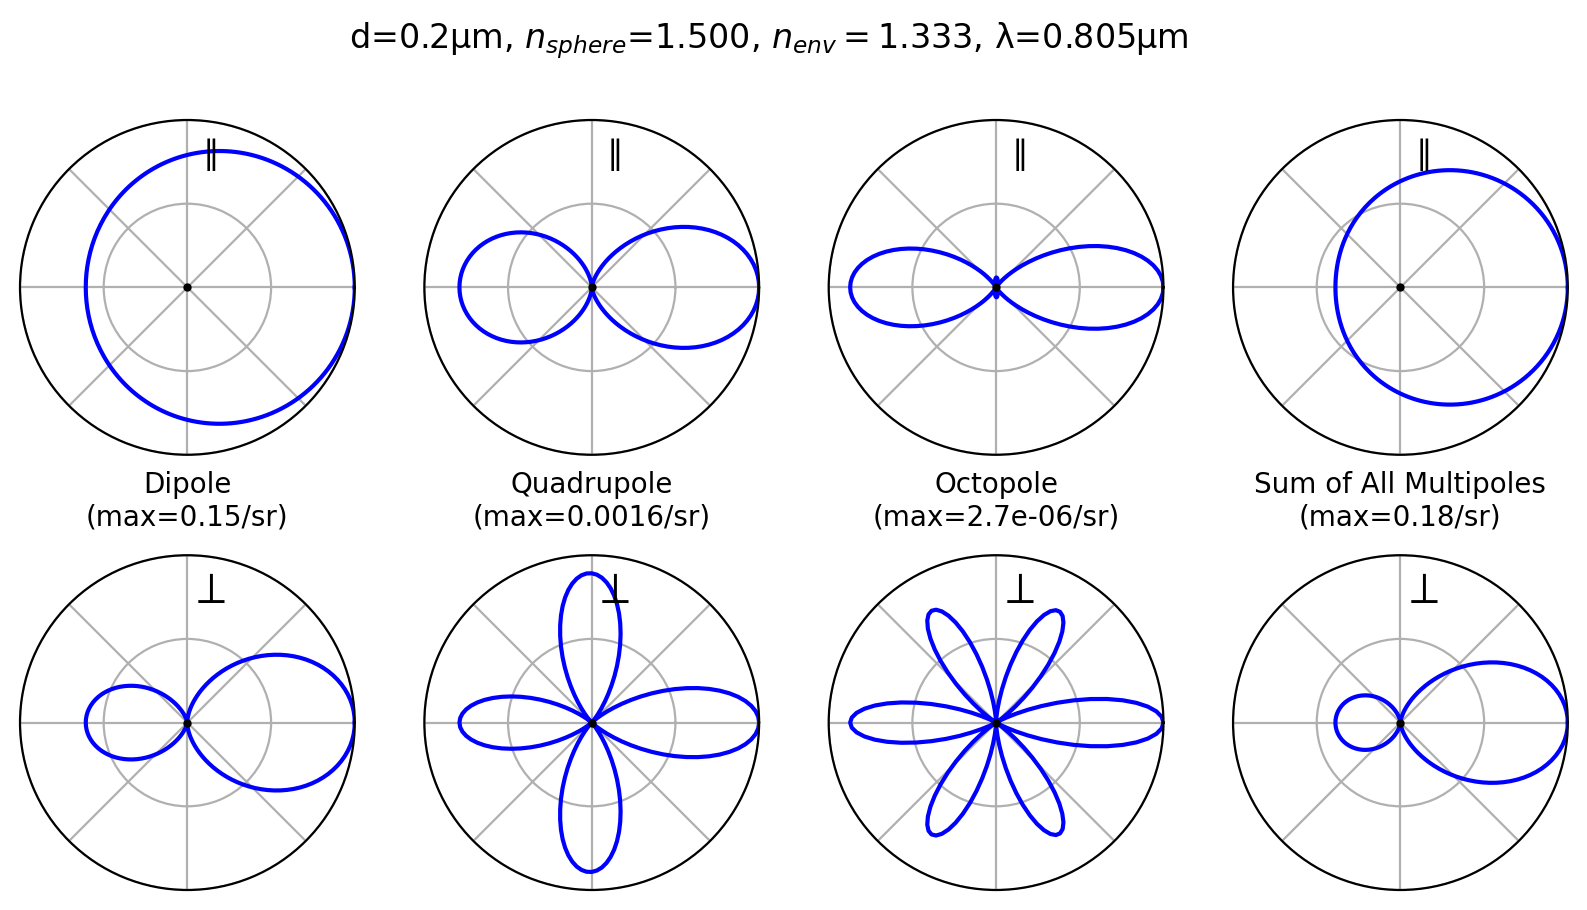

In [6]:
n_sph = 1.5
n_env = 1.333
d = 0.2
lambda0 = 0.805
thetad = np.linspace(0, 360, 181)
theta = np.radians(thetad)
mu = np.cos(theta)

# Set up the plot
fig, axes = plt.subplots(
    2, 4, figsize=(10, 5), subplot_kw={"polar": True}, gridspec_kw={"hspace": 0.3}
)
fig.suptitle(
    "d=%.1fµm, $n_{sphere}$=%.3f, $n_{env}=$%.3f, λ=%.3fµm" % (d, n_sph, n_env, lambda0),
    fontsize=12,
)

titles = [
    (r"$\perp$ — Dipole", r"$\parallel$ — Dipole"),
    (r"$\perp$ — Quadrupole", r"$\parallel$ — Quadrupole"),
    (r"$\perp$ — Octopole", r"$\parallel$ — Octopole"),
    (r"$\perp$ — Hexadecapole", r"$\parallel$ — Hexadecapole"),
    (r"$\perp$ — All terms", r"$\parallel$ — All terms"),
]

title = [
    "Dipole",
    "Quadrupole",
    "Octopole",
    "Sum of All Multipoles",
]

term = np.array([1, 2, 3, 0])

for i, title1 in enumerate(title):
    col = i
    par, per = mie.intensities(n_sph, d, lambda0, mu, n_env=n_env, n_pole=term[col])

    maxx = np.max(par)
    # Left column (perpendicular)
    axes[0, col].set_rlabel_position(135)  # This will position the labels at 45 degrees
    axes[0, col].plot(theta, per / maxx, color="blue")
    axes[0, col].plot([0], [0], "ok", markersize=2)

    axes[0, col].set_ylabel("")
    axes[0, col].set_xticklabels([])
    axes[0, col].set_rmax(1)
    axes[0, col].set_yticks([0.5, 1.0])
    axes[0, col].set_yticklabels(["", ""])
    axes[0, col].set_xlabel("%s\n(max=%.2g/sr)" % (title[col], maxx), labelpad=-8)
    axes[0, col].text(np.pi / 2.2, 0.8, r"$\parallel$", fontsize=12, ha="center", va="center")

    # Right column (parallel)
    maxx = np.max(per)
    axes[1, col].set_rlabel_position(135)  # This will position the labels at 45 degrees
    axes[1, col].plot(theta, par / maxx, color="blue")
    axes[1, col].plot([0], [0], "ok", markersize=2)
    axes[1, col].set_ylabel("")
    axes[1, col].set_xticklabels([])
    axes[1, col].set_rmax(1)
    axes[1, col].set_yticks([0.5, 1.0])
    axes[1, col].set_yticklabels(["", ""])
    axes[1, col].text(np.pi / 2.2, 0.8, r"$\perp$", fontsize=16, ha="center", va="center")
#    axes[1, col].set_xlabel('%s\n(max=%.2g/sr)'%(title[col],maxx), labelpad=-8)


plt.show()

Now you might worry that I am calculating the contribution from each multipole incorrectly.  Here I obtain the first ten multipoles and then compare the sum of these amplitudes with the expected (tested) Mie intensity.

In [8]:
n_sph = 1.5
n_env = 1.333
d = 1
lambda0 = 0.805
thetad = np.linspace(0, 360, 5)
theta = np.radians(thetad)
mu = np.cos(theta)
m = n_sph / n_env
x = np.pi * d / (lambda0 / n_env)

j = 0
sum_par = 0
sum_per = 0
print(" n         S1[%.1f°]               S2[%.1f°]" % (thetad[j], thetad[j]))
for n in range(1, 10):
    S1, S2 = mie.S1_S2(m, x, mu, n_pole=n)
    sum_par += S1
    sum_per += S2
    print("%2d " % n, comp_str(S1[j]), "   ", comp_str(S2[j]))

print("------------------------------------------------")
print("all", comp_str(sum_par[j]), "   ", comp_str(sum_per[j]))

S1, S2 = mie.S1_S2(m, x, mu, n_pole=0)
print()
print("expected")
print("   ", comp_str(S1[j]), "   ", comp_str(S2[j]))

 n         S1[0.0°]               S2[0.0°]
 1  ( 0.12459 + 0.17201j)     ( 0.12459 + 0.17201j)
 2  ( 0.18534 + 0.27880j)     ( 0.18534 + 0.27880j)
 3  ( 0.22058 + 0.36805j)     ( 0.22058 + 0.36805j)
 4  ( 0.11029 + 0.32806j)     ( 0.11029 + 0.32806j)
 5  ( 0.01601 + 0.13879j)     ( 0.01601 + 0.13879j)
 6  ( 0.00093 + 0.03459j)     ( 0.00093 + 0.03459j)
 7  ( 0.00003 + 0.00609j)     ( 0.00003 + 0.00609j)
 8  ( 0.00000 + 0.00081j)     ( 0.00000 + 0.00081j)
 9  ( 0.00000 + 0.00008j)     ( 0.00000 + 0.00008j)
------------------------------------------------
all ( 0.65777 + 1.32728j)     ( 0.65777 + 1.32728j)

expected
    ( 0.65777 + 1.32728j)     ( 0.65777 + 1.32728j)
